In [ ]:
#!pip install annoy

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Read the CSV file into a DataFrame
games = pd.read_csv("games.csv")

In [ ]:
games.drop('Estimated owners', inplace=True, axis=1)
games.drop('Peak CCU', inplace=True, axis=1)
games.drop('Required age', inplace=True, axis=1)
games.drop('DLC count', inplace=True, axis=1)
games.drop('Supported languages', inplace=True, axis=1)
games.drop('Full audio languages', inplace=True, axis=1)
games.drop('Support email', inplace=True, axis=1)
games.drop('Support url', inplace=True, axis=1)
games.drop('Website', inplace=True, axis=1)
games.drop('Windows', inplace=True, axis=1)
games.drop('Mac', inplace=True, axis=1)
games.drop('Linux', inplace=True, axis=1)
games.drop('Screenshots', inplace=True, axis=1)
games.drop('Movies', inplace=True, axis=1)
games.drop('Achievements', inplace=True, axis=1)
games.drop('Notes', inplace=True, axis=1)
games.drop('Score rank', inplace=True, axis=1)
games.drop('Recommendations', inplace=True, axis=1)
games.drop('User score', inplace=True, axis=1)
games.drop('Metacritic score', inplace=True, axis=1)
games.drop('Metacritic url', inplace=True, axis=1)
games.drop('Median playtime forever', inplace=True, axis=1)
games.drop('Median playtime two weeks', inplace=True, axis=1)

In [ ]:
type(games['Reviews'])

In [ ]:
games['Reviews']

In [ ]:
games

In [ ]:
import pandas as pd

# Count the number of zeros
count_zeros = (games['Average playtime forever'] == 0).sum()

# Count the number of non-zeros and non-NaNs
count_non_zeros = (games['Average playtime forever'] != 0).sum()

# Count the number of NaNs
count_nans = games['Average playtime forever'].isna().sum()

print(f"Number of zeros: {count_zeros}")
print(f"Number of non-zeros and non-NaNs: {count_non_zeros}")
print(f"Number of NaNs: {count_nans}")


In [ ]:
import pandas as pd

# Count the number of zeros
count_zeros = (games['Reviews'] == 0).sum()

# Count the number of non-zeros and non-NaNs
count_non_zeros = (games['Reviews'] != 0).sum()

# Count the number of NaNs
count_nans = games['Average playtime forever'].isna().sum()

print(f"Number of zeros: {count_zeros}")
print(f"Number of non-zeros and non-NaNs: {count_non_zeros}")
print(f"Number of NaNs: {count_nans}")


# USE THIS: Code for recomsystem.py

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Read the CSV file into a DataFrame
games = pd.read_csv("games.csv")

In [2]:
games.drop('Estimated owners', inplace=True, axis=1)
games.drop('Peak CCU', inplace=True, axis=1)
games.drop('Required age', inplace=True, axis=1)
games.drop('DLC count', inplace=True, axis=1)
games.drop('Supported languages', inplace=True, axis=1)
games.drop('Full audio languages', inplace=True, axis=1)
games.drop('Support email', inplace=True, axis=1)
games.drop('Support url', inplace=True, axis=1)
games.drop('Website', inplace=True, axis=1)
games.drop('Windows', inplace=True, axis=1)
games.drop('Mac', inplace=True, axis=1)
games.drop('Linux', inplace=True, axis=1)
games.drop('Screenshots', inplace=True, axis=1)
games.drop('Movies', inplace=True, axis=1)
games.drop('Achievements', inplace=True, axis=1)
games.drop('Notes', inplace=True, axis=1)
games.drop('Score rank', inplace=True, axis=1)
games.drop('Recommendations', inplace=True, axis=1)
games.drop('User score', inplace=True, axis=1)
games.drop('Metacritic score', inplace=True, axis=1)
games.drop('Metacritic url', inplace=True, axis=1)
games.drop('Median playtime forever', inplace=True, axis=1)
games.drop('Median playtime two weeks', inplace=True, axis=1)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import pandas as pd

def recommend_similar_games(data_frame, input_games_str):
    
    # Convert the comma-separated string to a list of input games
    input_games = [game.strip() for game in input_games_str.split(',')]
    
    # Review Ratio is the Number of Positive Reviews made on steam of a particular game divided by the total number of steam reviews for that game
    games["Review Ratio"]=(games["Positive"]/(games["Positive"]+games["Negative"]))
    games["Review Sum"]=(games["Positive"]+games["Negative"])

    # steam_total_reviews is the total number of reviews made for all games on steam
    steam_total_reviews=sum(games['Review Sum'])
    steam_total_reviews

    # Combined Score is the # of positive reviews for a game divided by the total number of reviews for all games on steam
    games['Combined Score'] = games['Review Ratio'] * (games['Review Sum']/steam_total_reviews)
    
    # Preprocess the data
    data_frame['Genres'] = data_frame['Genres'].fillna('')
    data_frame['Combined Score'] = data_frame['Combined Score'].fillna(0)
    data_frame['Tags'] = data_frame['Tags'].fillna('')  # Add this line to handle missing Tags
    data_frame['Features'] = data_frame['Genres'] + ' ' + data_frame['Combined Score'].astype(str) + ' ' + data_frame['Tags']

    # Create a TF-IDF vectorizer for the combined features
    tfidf_vectorizer_combined = TfidfVectorizer()
    tfidf_matrix_combined = tfidf_vectorizer_combined.fit_transform(data_frame['Features'])

    # Build a nearest neighbors model for combined features
    knn_combined = NearestNeighbors(n_neighbors=30, metric='cosine')  # Increase n_neighbors to allow for more recommendations
    knn_combined.fit(tfidf_matrix_combined)

    recommended_games = set()

    for input_game_name in input_games:
        # Find the index of the given game in the DataFrame
        game_index = data_frame[data_frame['Name'] == input_game_name].index[0]

        # Use the nearest neighbors model to find the most similar games based on combined features
        distances_combined, indices_combined = knn_combined.kneighbors(tfidf_matrix_combined[game_index])

        # Get the 6 most similar games based on combined features
        similar_game_indices_combined = indices_combined[0]
        similar_games_combined = [data_frame.loc[i] for i in similar_game_indices_combined]

        # Sort the recommendations by the "Combined Score" in descending order
        similar_games_combined = sorted(similar_games_combined, key=lambda x: x['Combined Score'], reverse=True)

        # Filter out the input games and any duplicates
        unique_recommendations = [game for game in similar_games_combined if
                                  game['Name'] != input_game_name and game['Name'] not in input_games and game['Name'] not in recommended_games]

        # Add unique game names to the set
        recommended_games.update(game['Name'] for game in unique_recommendations[:6])

    return pd.DataFrame(unique_recommendations[:6])

# Example usage with three input games (up to 5)
input_games_str = "Galactic Bowling,Don't Drop the Bass,Christmas Santa Troubles"
recommended_games_df = recommend_similar_games(games, input_games_str)

if not recommended_games_df.empty:
    print("Recommended games:")
    for i, (_, game) in enumerate(recommended_games_df.iterrows()):
        input_game_name = input_games_str.split(',')[i % len(input_games_str.split(','))]
        input_game_genres = games[games['Name'] == input_game_name]['Genres'].values[0]
        input_game_tags = games[games['Name'] == input_game_name]['Tags'].values[0]
        print(f"Input Game {i + 1}: {input_game_name}, Genres: {input_game_genres}, Tags: {input_game_tags}, Recommendation {i + 1}: Name: {game['Name']}, Header image: {game['Header image']}, Genres: {game['Genres']}, Tags: {game['Tags']}, Combined Score: {game['Combined Score']}, Average playtime forever: {game['Average playtime forever']}")
else:
    print("No recommendations found for the input games.")


Recommended games:
Input Game 1: Galactic Bowling, Genres: Casual,Indie,Sports, Tags: Indie,Casual,Sports,Bowling, Recommendation 1: Name: Lift It, Header image: https://cdn.akamai.steamstatic.com/steam/apps/402220/header.jpg?t=1484940879, Genres: Action,Adventure,Casual,Indie,Simulation,Sports, Tags: Sports,Action,Adventure,Indie,Casual,Simulation, Combined Score: 6.451183656726153e-07, Average playtime forever: 447
Input Game 2: Don't Drop the Bass, Genres: Casual,Indie,Sports, Tags: Sports,Indie,Casual, Recommendation 2: Name: DUCK CASINO: BULLET, Header image: https://cdn.akamai.steamstatic.com/steam/apps/916970/header.jpg?t=1539257079, Genres: Action,Adventure,Casual,Indie,Simulation,Sports, Tags: Action,Indie,Casual,Simulation,Sports,Adventure, Combined Score: 6.451183656726153e-08, Average playtime forever: 0
Input Game 3: Christmas Santa Troubles, Genres: Action,Adventure,Casual,Indie,Sports, Tags: Adventure,Indie,Casual,Sports, Recommendation 3: Name: Kartofank VR, Header imag

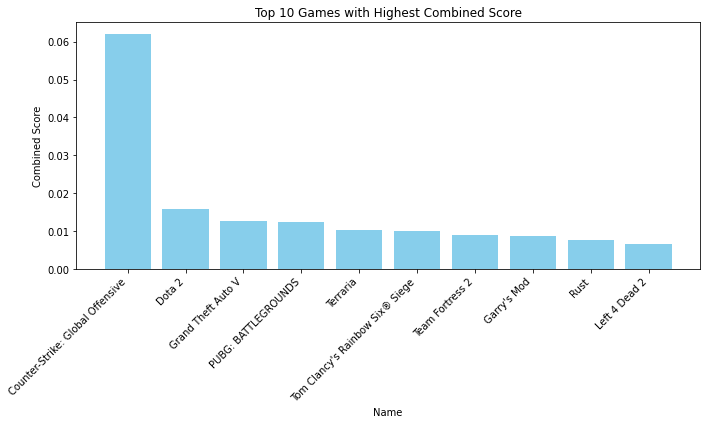

In [5]:
import matplotlib.pyplot as plt

# Sort the DataFrame by 'Combined Score' in descending order
sorted_games = games.sort_values(by='Combined Score', ascending=False)

# Get the top N games (adjust N as needed)
top_n = 10
top_games = sorted_games.head(top_n)

# Create a bar graph
fig = plt.figure(figsize=(10, 6))
plt.bar(top_games['Name'], top_games['Combined Score'], color='skyblue')
plt.xlabel('Name')
plt.ylabel('Combined Score')
plt.title(f'Top {top_n} Games with Highest Combined Score')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Save the plot to a file as .jpg with bbox_inches='tight' (adjust the filename as needed)
plt.savefig('topgames_combinedscore.jpg', bbox_inches='tight', dpi=150)

# Show the plot
plt.show()


# Old code

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
import pandas as pd

def recommend_similar_games(game_name, data_frame):
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.neighbors import NearestNeighbors
    import pandas as pd
    
    #Review Ratio is the Number of Positive Reviews made on steam of a particular game divided by the total number of steam reviews for that game
    games["Review Ratio"]=(games["Positive"]/(games["Positive"]+games["Negative"]))
    games["Review Sum"]=(games["Positive"]+games["Negative"])

    #steam_total_reviews is the total number of reviews made for all games on steam
    steam_total_reviews=sum(games['Review Sum'])
    steam_total_reviews

    #Combined Score is the # of positive reviews for a game divided by the total number of reviews for all games on steam
    games['Combined Score'] = games['Review Ratio'] * (games['Review Sum']/steam_total_reviews)
    
    # Preprocess the data
    data_frame['Genres'] = data_frame['Genres'].fillna('')
    data_frame['Combined Score'] = data_frame['Combined Score'].fillna(0)
    data_frame['Tags'] = data_frame['Tags'].fillna('')  # Add this line to handle missing Tags
    data_frame['Features'] = data_frame['Genres'] + ' ' + data_frame['Combined Score'].astype(str) + ' ' + data_frame['Tags']

    # Create a TF-IDF vectorizer for the combined features
    tfidf_vectorizer_combined = TfidfVectorizer()
    tfidf_matrix_combined = tfidf_vectorizer_combined.fit_transform(data_frame['Features'])

    # Build a nearest neighbors model for combined features
    knn_combined = NearestNeighbors(n_neighbors=30, metric='cosine')  # Increase n_neighbors to allow for more recommendations
    knn_combined.fit(tfidf_matrix_combined)

    recommended_games = set()

    # Find the index of the given game in the DataFrame
    game_index = data_frame[data_frame['Name'] == game_name].index[0]

    # Use the nearest neighbors model to find the most similar games based on combined features
    distances_combined, indices_combined = knn_combined.kneighbors(tfidf_matrix_combined[game_index])

    # Get the 6 most similar games based on combined features
    similar_game_indices_combined = indices_combined[0]
    similar_games_combined = [data_frame.loc[i] for i in similar_game_indices_combined]

    # Sort the recommendations by the "Combined Score" in descending order
    similar_games_combined = sorted(similar_games_combined, key=lambda x: x['Combined Score'], reverse=True)

    # Filter out the input games and any duplicates
    unique_recommendations = [game for game in similar_games_combined if
                              game['Name'] != game_name and game['Name'] not in input_games and game['Name'] not in recommended_games]

    # Add unique game names to the set
    recommended_games.update(game['Name'] for game in unique_recommendations[:6])

    return pd.DataFrame(unique_recommendations[:6])

# Example usage with three input games (up to 5)
input_games = ["Galactic Bowling", "Don't Drop the Bass", "Christmas Santa Troubles"]
recommended_games_df = recommend_similar_games("Galactic Bowling", games)

if not recommended_games_df.empty:
    print("Recommended games:")
    for i, (_, game) in enumerate(recommended_games_df.iterrows()):
        input_game_name = input_games[i % len(input_games)]
        input_game_genres = games[games['Name'] == input_game_name]['Genres'].values[0]
        input_game_tags = games[games['Name'] == input_game_name]['Tags'].values[0]
        print(f"Input Game {i + 1}: {input_game_name}, Genres: {input_game_genres}, Tags: {input_game_tags}, Recommendation {i + 1}: Name: {game['Name']}, Header image: {game['Header image']}, Genres: {game['Genres']}, Tags: {game['Tags']}, Combined Score: {game['Combined Score']}, Average playtime forever: {game['Average playtime forever']}")
else:
    print("No recommendations found for the input game.")

This code is designed to recommend similar video games based on their genres and combined scores. It uses a TF-IDF vectorization and nearest neighbors approach to find games with similar features and scores. Here are the important steps in the code:

1. **Data Preprocessing**: The code preprocesses the game data, specifically the 'Genres' and 'Combined Score' columns. It fills missing values in the 'Genres' column with empty strings and missing 'Combined Score' values with zeros. It also creates a new 'Features' column by combining 'Genres' and 'Combined Score' as strings.

2. **TF-IDF Vectorization**: It creates a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer called `tfidf_vectorizer_combined`. This vectorizer is used to transform the 'Features' column into a numerical representation suitable for similarity calculations. It converts the text data into a numerical format that the machine learning model can work with.

3. **Nearest Neighbors Model**: The code builds a nearest neighbors model named `knn_combined` using the NearestNeighbors class from scikit-learn. This model uses the cosine distance metric and is fitted with the TF-IDF transformed data. It is designed to find the most similar games based on the features and scores.

4. **Recommendation Function**: The `recommend_similar_games` function takes a list of input games, and for each input game, it performs the following steps:
   - Find the index of the given input game in the DataFrame.
   - Use the nearest neighbors model to find the most similar games based on combined features.
   - Sort the recommendations by the "Combined Score" in descending order.
   - Filter out the input games themselves and any duplicates from previous recommendations.
   - Append up to 5 unique recommendations to the `recommended_games` list.

5. **Example Usage**: The code provides an example usage with three input games: "Galactic Bowling," "Circle of Sumo," and "Dr. Tacocat." It then calls the `recommend_similar_games` function with these input games. The recommendations are printed, showing the input game and its top recommendations. If no recommendations are found, it displays a message indicating that no recommendations were found for the input games.

The code ensures that there are up to 5 recommendations for each input game and that duplicates of input games or previous recommendations are filtered out, resulting in a list of unique game recommendations.

# Base Model (Improved Model Above)

In [ ]:
# Preprocess the data
games['Publishers'] = games['Publishers'].fillna('')
games['Genres'] = games['Genres'].fillna('')
games['Features'] = games['Publishers'] + ' ' + games['Genres']

# Create a TF-IDF vectorizer for both combined features and genres
tfidf_vectorizer_combined = TfidfVectorizer()
tfidf_matrix_combined = tfidf_vectorizer_combined.fit_transform(games['Features'])
tfidf_vectorizer_genres = TfidfVectorizer()
tfidf_matrix_genres = tfidf_vectorizer_genres.fit_transform(games['Genres'])

# Build nearest neighbors models for both combined features and genres
knn_combined = NearestNeighbors(n_neighbors=6, metric='cosine')
knn_genres = NearestNeighbors(n_neighbors=6, metric='cosine')
knn_combined.fit(tfidf_matrix_combined)
knn_genres.fit(tfidf_matrix_genres)

# Function to recommend similar games with "Header image" and "Genres"
def recommend_similar_games(game_name, games_df=games, knn_combined=knn_combined, knn_genres=knn_genres, tfidf_matrix_combined=tfidf_matrix_combined, tfidf_matrix_genres=tfidf_matrix_genres):
    # Find the index of the given game in the DataFrame
    game_index = games_df[games_df['Name'] == game_name].index[0]
    
    # Use the nearest neighbors model to find the most similar games for both combined and genres models
    distances_combined, indices_combined = knn_combined.kneighbors(tfidf_matrix_combined[game_index])
    distances_genres, indices_genres = knn_genres.kneighbors(tfidf_matrix_genres[game_index])
    
    # Exclude the input game itself from recommendations for both models
    similar_game_indices_combined = indices_combined[0][1:]
    similar_game_indices_genres = indices_genres[0][1:]
    
    # Get the 5 most similar games for both models
    similar_games_combined = [games_df.loc[i] for i in similar_game_indices_combined]
    similar_games_genres = [games_df.loc[i] for i in similar_game_indices_genres]
    
    # Check if the priority model (combined) has enough recommendations
    if len(similar_games_combined) >= 5:
        recommended_games = similar_games_combined[:5]
    else:
        # Combine recommendations from the priority model and genres model
        combined_recommendations = similar_games_combined + similar_games_genres
        
        # Remove duplicates and return up to 5 recommendations
        recommended_games = list(set(combined_recommendations))[:5]
    
    return pd.DataFrame(recommended_games)

# Example usage
input_game_name = "Galactic Bowling"
recommended_games_df = recommend_similar_games(input_game_name)

if not recommended_games_df.empty:
    print(f"For the game '{input_game_name}', 5 similar recommendations are:")
    for i, (_, game) in enumerate(recommended_games_df.iterrows()):
        print(f"{i + 1}. Name: {game['Name']}, Header image: {game['Header image']}, Genres: {game['Genres']}")
else:
    print(f"No recommendations found for the game '{input_game_name}'.")


Calculate the "Review Ratio" for each game.

Consider both genres and the "Review Ratio" for recommendations, prioritizing genres.

Rank the games based on the "Review Ratio" as a secondary factor.

Ensure that the total number of reviews (positive + negative) is also considered to prevent overly biased recommendations based solely on "Review Ratio."

In [ ]:
# Create a reverse index for the "Review Sum" column with the "Name" column
review_sum_reverse_index = dict(zip(games['Name'], games['Review Sum']))
game_name = "Super Tennis Blast"
if game_name in review_sum_reverse_index:
    review_sum = review_sum_reverse_index[game_name]
    print(f"Review Sum for '{game_name}': {review_sum}")
else:
    print(f"No review sum found for '{game_name}'")


In [ ]:
# Create a reverse index for the "Review Sum" column with the "Name" column
review_sum_reverse_index = dict(zip(games['Name'], games['Genres']))
game_name = "Football Club Simulator - FCS #21"
if game_name in review_sum_reverse_index:
    review_sum = review_sum_reverse_index[game_name]
    print(f"Review Sum for '{game_name}': {review_sum}")
else:
    print(f"Genres for '{game_name}'")

In [ ]:
type(games['Combined Score'])